In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandahouse

from read_db.read_clickhouse import connection



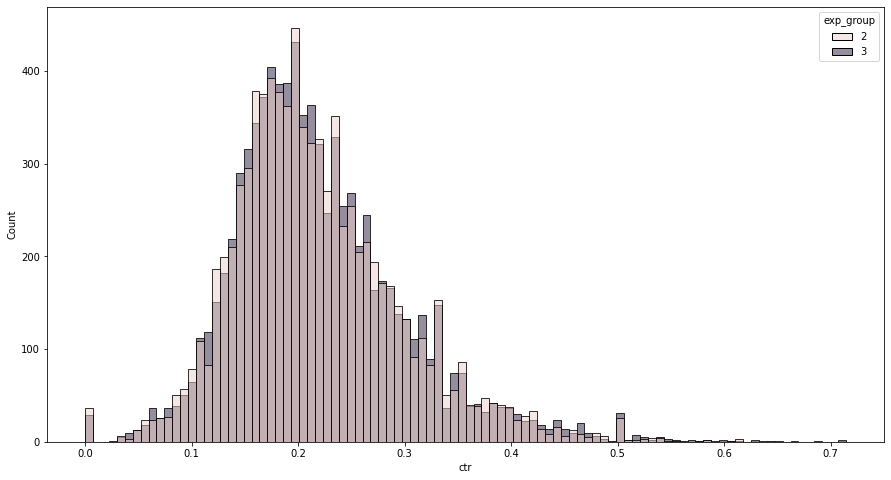

In [2]:
#читаем данные из бд
q = """SELECT 
        exp_group, user_id,
        sum(action='like')/sum(action='view') ctr
        
       FROM {db}.feed_actions 
       where toDate(time) between '2022-10-26' and '2022-11-01' 
       and exp_group in (2,3) 
       group by exp_group, user_id

       """

df = pandahouse.read_clickhouse(q, connection=connection)


# посмотрим на распредление CTR по группам
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(x='ctr', data=df, hue='exp_group', ax=ax)
plt.show()

# AA test

Статистические значимые различия наблюдаются в 5.12 % случаев


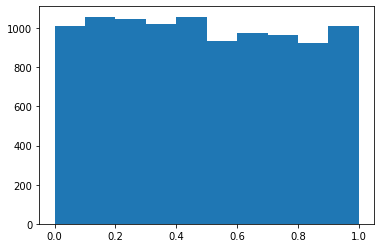

In [3]:
sample_size = 500
num_tests = 10000

res = []
for _ in range(num_tests):
    g1 = np.random.choice(df.query("exp_group==2").ctr.values, sample_size)
    g2 = np.random.choice(df.query("exp_group==3").ctr.values, sample_size)

    res.append(stats.ttest_ind(g1,g2).pvalue)
res = np.array(res)


print('Статистические значимые различия наблюдаются в', len(res[res<=0.05]) * 100/len(res), '% случаев' )
plt.hist(res)
plt.show()
    

# Вывод
Система сплитования работает корректно.

Доля случаев со статистически значимыми различиями близка к заданному $\alpha = 0.05$ 

При увеличении числа повторений доля случаев будет стремится к $\alpha$